# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# Load data
df = pd.read_csv('peer_effects_room.csv')

In [3]:
# Create column with the other persons in the room
persons_in_rooms = df.groupby('room')['person'].unique()
def get_other_person(lst):
    person, room = lst
    persons = persons_in_rooms[room]
    other = [i for i in persons if i != person][0]
    return other
df['person_other'] = df[['person','room']].apply(get_other_person, axis=1)

<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [4]:
# Add information on the roommate GPA
df = df.merge(df[['high_school_GPA','college_GPA','person_other']],left_on='person',
              right_on='person_other',suffixes=('','_other')).drop('person_other_other',axis=1)

<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

Text(0.5, 1.0, 'High school and college GPA')

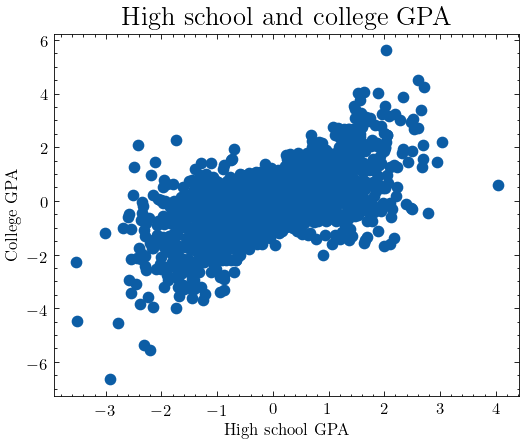

In [5]:
# pip install git+https://github.com/garrettj403/SciencePlots.git
plt.style.use('science')    
plt.figure(figsize=(5,4),dpi=120)
plt.scatter(df['high_school_GPA'],df['college_GPA'])
plt.xlabel('High school GPA')
plt.ylabel('College GPA')
plt.title('High school and college GPA', fontsize=16)

# COMMENT: Unsurprisingly, there is a clear correlation between high school and college GPA

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

Text(0.5, 1.0, 'High school GPA')

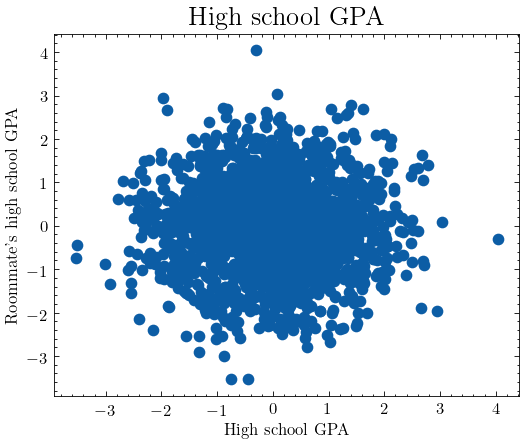

In [6]:
# Make plot
plt.style.use('science')    
plt.figure(figsize=(5,4),dpi=120)
plt.scatter(df['high_school_GPA'],df['high_school_GPA_other'])
plt.xlabel('High school GPA')
plt.ylabel('Roommate\'s high school GPA')
plt.title('High school GPA', fontsize=16)

# COMMENT: There does not appear to be a clear correlation.

In [7]:
# Estimate regression
mod = smf.ols('high_school_GPA ~ high_school_GPA_other', df)
res = mod.fit()
res.summary()

# COMMENT: Under random assignment, we would not expect students with a higher GPA to be put in rooms with other
#          students with a higher GPA (and vice versa). Thus, we should expect no correlation between student GPA's
#          within rooms. As the regression shows, this is also the case (p=0.79). Therefore, I conclude that
#          random assignment appears to be satisfied.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.788
Time:                        14:18:53   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

Text(0.5, 1.0, 'College GPA and roommate high school GPA')

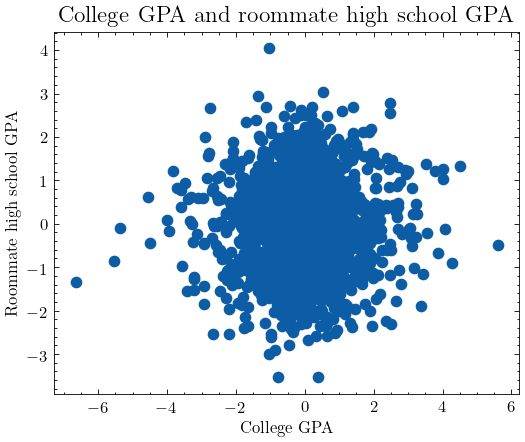

In [8]:
# Plot own GPA in college versus roommate GPA in high school
plt.figure(figsize=(5,4),dpi=120)
plt.scatter(df['college_GPA'],df['high_school_GPA_other'])
plt.xlabel('College GPA')
plt.ylabel('Roommate high school GPA')
plt.title('College GPA and roommate high school GPA', fontsize=14)

# COMMENT: Not clear that there is a correlation.

In [9]:
# Estimate regression model
mod = smf.ols('college_GPA ~ high_school_GPA_other', df)
res = mod.fit()
res.summary()
# COMMENT: Both visually and statistically, there is no significant correlation between college GPA and roommate GPA
#          in high school (p=0.21). 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.584
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.208
Time:                        14:18:53   Log-Likelihood:                -3099.5
No. Observations:                2000   AIC:                             6203.
Df Residuals:                    1998   BIC:                             6214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0427      0.026     -1.674      0.094      -0.093       0.007
high_school_GPA_other     0.0314      0.025      1.259      0.208      -0.018       0.080
==============================================================================
Omnibus:                      120.285   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.476
Skew:                          -0.100   Prob(JB):                    6.27e-106
Kurtosis:                       5.403   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Alternate regression
mod = smf.ols('college_GPA ~ high_school_GPA + high_school_GPA_other',df)
res = mod.fit()
res.summary()

# COMMENT: In the previous regression, the question was 'does roommate GPA (in high school) affect my own GPA
#          in college'. Now, the question changes to 'does roommate GPA (in high school) affect my own GPA improvement
#          in college compared to high school'. Given random assignment (which I argued for previously), there is no
#          difference between the two questions. However, I find that this alternative regression is very close to
#          being significant (p=0.07). I still conclude that there is a lack of strong evidence for peer effects, however
#          the evidence is not clear. It is possible that if we had had a slightly larger sample, the effect would have
#          been significant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Mon, 18 May 2020   Prob (F-statistic):          1.03e-223
Time:                        14:18:53   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0226      0.020     -1.147      0.252      -0.061       0.016
high_school_GPA           0.7059      0.019     36.606      0.000       0.668       0.744
high_school_GPA_other     0.0356      0.019      1.847      0.065      -0.002       0.073
==============================================================================
Omnibus:                       77.587   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.025
Skew:                          -0.117   Prob(JB):                     5.52e-47
Kurtosis:                       4.582   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [11]:
# NOTE: I think the question is stated incorrectly? I estimate the following regression: 
mod = smf.ols('college_GPA ~ college_GPA_other',df)
res = mod.fit()
res.summary()

# COMMENT: I see that the roommate's college GPA significantly explains the college GPA (p=0.00).
#          This is evidence in favor of peers effects.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     13.91
Date:                Mon, 18 May 2020   Prob (F-statistic):           0.000197
Time:                        14:18:53   Log-Likelihood:                -3093.3
No. Observations:                2000   AIC:                             6191.
Df Residuals:                    1998   BIC:                             6202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0400      0.025     -1.571      0.116      -0.090       0.010
college_GPA_other     0.0832      0.022      3.730      0.000       0.039       0.127
==============================================================================
Omnibus:                      120.885   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.924
Skew:                          -0.101   Prob(JB):                    6.78e-107
Kurtosis:                       5.414   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

In [12]:
# They utilize variation in the composition of students across years in the same school. For instance, one year
# there might be many resourceful students, and the next year there might not be. Comparing the performance of the
# students these two years then takes care of selection issues, since the background characteristica are (roughly)
# the same both years.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

In [13]:
# Shortcomings: Results might be driven by time trends in both background characteristics and performance. Hoxby (2000)
# tests for this by randomizing the years and examining the results.

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

In [14]:
# I think the identification strategies of comparing the same schools across years employed by Kraka makes a lot of sense.
# Another idea could be to compare schools located close to each other. The strength is that the time trend issue is
# avoided, but the weakness is that there might be some other selection into schools. Perhaps one could also compare
# school groups ('skolleklasser') within a school, if students are allocated randomly to the groups.